# MNIST lies on a simple 2-D manifold. Let's look at a more complicated dataset. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mnist.loader import MNIST
import seaborn as sns
from sklearn.decomposition import PCA

from clustering import analysis 

# Dimension reduction and clustering libraries
import umap
import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('Fashion-MNIST')
mnist.target = mnist.target.astype(int)
data = mnist.data.values

/Users/andrew/mambaforge/envs/clustering/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


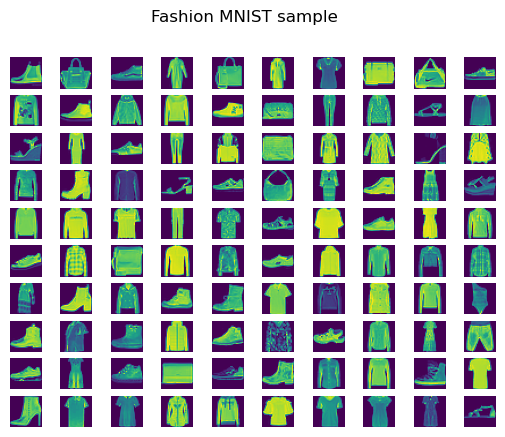

In [3]:
fig, axs = plt.subplots(10,10)
fig.suptitle(f'Fashion MNIST sample')
for ax, idx in zip(axs.flatten(),np.random.choice(len(data), 100)):
    ax.imshow(data[idx].reshape(28,28))
    ax.axis('off')

In [4]:
mnist_pca =  PCA()
mnist_pca.fit(data)

PCA()

Text(0.5, 0, 'Number of principal components')

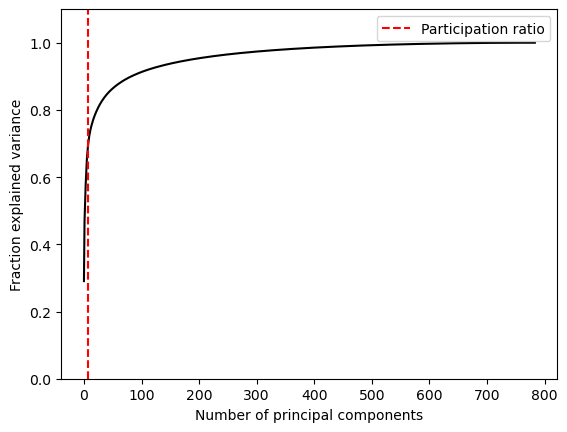

In [8]:
fig,ax = plt.subplots(1,1)
ax.plot(np.cumsum(mnist_pca.explained_variance_ratio_),color='k')
ax.vlines(analysis.get_participation_ratio(mnist_pca), ymin=0,ymax=1.1,linestyles='--',colors='r',label='Participation ratio')
ax.legend()
ax.set_ylim(0,1.1)
ax.set_ylabel('Fraction explained variance')
ax.set_xlabel('Number of principal components')

In [9]:
lowd_mnist = PCA(n_components=50).fit_transform(data)
pca_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(lowd_mnist)

In [10]:
pca_clustered = (pca_labels >= 0)
print(f'Proportion of data points assigned to a cluster after PCA: {pca_clustered.sum()/len(lowd_mnist)}')
print(f'Number of found clusters: {len(np.unique(pca_labels[pca_labels >=0]))}')

Proportion of data points assigned to a cluster after PCA: 0.23431428571428572
Number of found clusters: 4


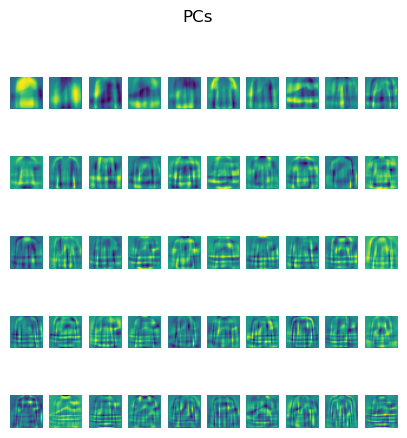

In [11]:
fig, axs = plt.subplots(5,10,figsize=(5,5))
fig.suptitle(f'PCs')
for ax, idx in zip(axs.flatten(),range(len(mnist_pca.components_))):
    ax.imshow(mnist_pca.components_[idx].reshape(28,28))
    ax.axis('off')

In [12]:
pca_labeled_examples = []
for pred_label in np.unique(pca_labels[pca_labels >=0]):
    indices = (pca_labels == pred_label)
    pca_labeled_examples.append(data[indices])

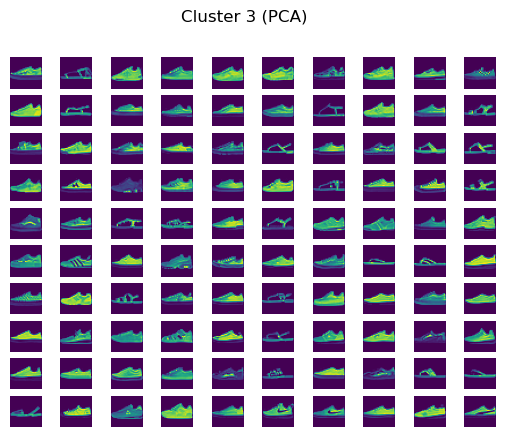

In [28]:
lab=3
fig, axs = plt.subplots(10,10)
fig.suptitle(f'Cluster {lab} (PCA)')
for ax, idx in zip(axs.flatten(),np.random.choice(len(pca_labeled_examples[lab]), 100)):
    ax.imshow(pca_labeled_examples[lab][idx].reshape(28,28))
    ax.axis('off')

In [14]:
umap_embedding = umap.UMAP(n_neighbors=30, min_dist=0.1,n_components=2).fit_transform(data)
# umap_embedding = umap.UMAP(n_neighbors=30, min_dist=0,n_components=2).fit_transform(data)

In [18]:
umap_labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(umap_embedding)

In [19]:
umap_clustered = (umap_labels >= 0)
print(f'Proportion of data points assigned to a cluster after UMAP: {umap_clustered.sum()/len(lowd_mnist)}')
print(f'Number of found clusters: {len(np.unique(umap_labels[umap_labels >=0]))}')

Proportion of data points assigned to a cluster after UMAP: 1.0
Number of found clusters: 3


In [20]:
umap_labeled_examples = []
for pred_label in np.unique(umap_labels[umap_labels >=0]):
    indices = (umap_labels == pred_label)
    umap_labeled_examples.append(data[indices])

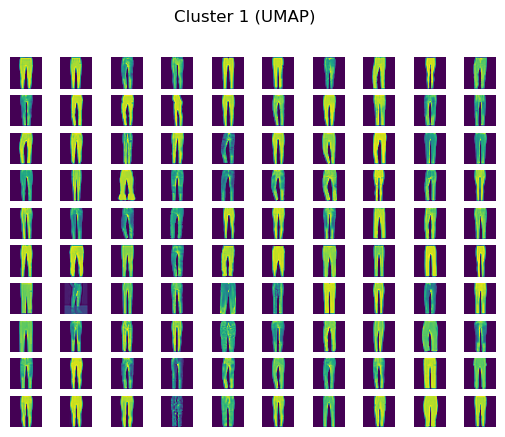

In [33]:
lab=1
fig, axs = plt.subplots(10,10)
fig.suptitle(f'Cluster {lab} (UMAP)')
for ax, idx in zip(axs.flatten(),np.random.choice(len(umap_labeled_examples[lab]), 100)):
    ax.imshow(umap_labeled_examples[lab][idx].reshape(28,28))
    ax.axis('off')

In [34]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(data)

/Users/andrew/mambaforge/envs/clustering/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


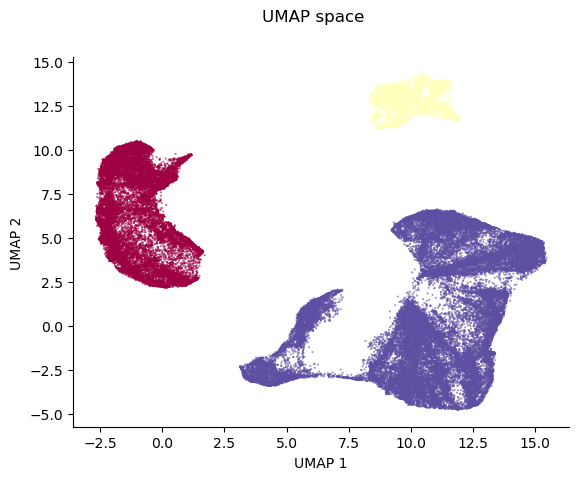

In [35]:
clustered = (umap_labels >= 0)
fig, ax = plt.subplots()
ax.scatter(standard_embedding[~umap_clustered, 0],
            standard_embedding[~umap_clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
ax.scatter(umap_embedding[umap_clustered, 0],
            umap_embedding[umap_clustered, 1],
            c=umap_labels[umap_clustered],
            s=0.1,
            cmap='Spectral')
fig.suptitle('UMAP space')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.spines[['top', 'right']].set_visible(False)

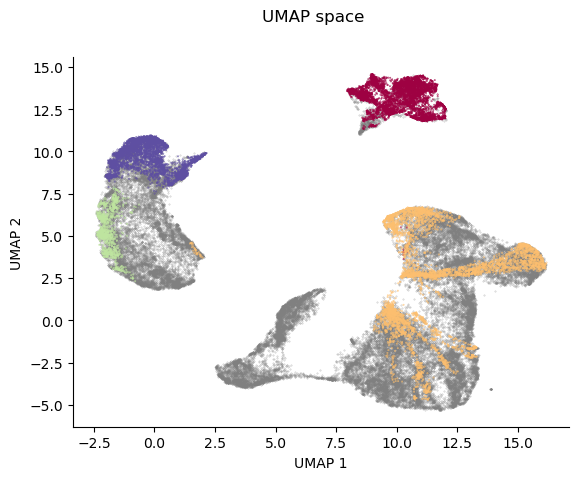

In [36]:
clustered = (pca_labels >= 0)
fig, ax = plt.subplots()
ax.scatter(standard_embedding[~pca_clustered, 0],
            standard_embedding[~pca_clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
ax.scatter(standard_embedding[pca_clustered, 0],
            standard_embedding[pca_clustered, 1],
            c=pca_labels[pca_clustered],
            s=0.1,
            
            cmap='Spectral')
fig.suptitle('UMAP space')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.spines[['top', 'right']].set_visible(False)